# Support Vector Machines

Finding decision boundary between classes using large margin classification.

$$J(\Theta) = C \sum_{i=0}^{m}[ { y^{(i)} cost_1(\Theta^T f^{(i)}) 
                       + (1 - y^{(i)}) cost_0(\Theta^T f^{(i)}) }] + \frac{1}{2} \sum_{i = 0}^{n} \theta^2_i$$
                       
$$y^{(i)} =
  \begin{cases}
    1       & \quad \Theta^T f^{(i)} \ge 1 \\
    0  & \quad \Theta^T f^{(i)} \le -1
  \end{cases}$$
                       
Where $f^{(i)}$ is a similarity function $K(x^{(i)}, x^{(j)})$ between input $x^{(i)}$ and $x^{(j)}$. 
Similarity function is defined by the kernel.

$m$ - number of training examples, $n$ - number of features.

## Linear Kernel

The problem is simillar to logistic regression.

$$K(x^{(i)}, x^{(j)}) = (x^{(i)})^T x^{(j)}$$

In [256]:
# import libs
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn import svm
import math

In [266]:
# load data
data = scipy.io.loadmat('../data/ex6data1.mat')

x = data['X']
y = data['y']

print("x", x.shape, "y", y.shape)

x (51, 2) y (51, 1)


Regularization parameter $C$ has the same effect as $\frac{1}{\lambda}$ in logistic regression.

In [267]:
# learn SVM parameters
def fit_svm(x, y, kernel, C=1, gamma=1):
    clf = svm.SVC(C=C, gamma=gamma, max_iter=C*10000, kernel=kernel)
    clf.fit(x, y.ravel())
    return clf

In [268]:
# plot data
def plot_data():
    positive = x[(y == 1).T[0],:]
    negative = x[(y == 0).T[0],:]

    plt.scatter(positive[:,0], positive[:,1], marker="+")
    plt.scatter(negative[:,0], negative[:,1], marker=".")
    plt.xlabel("x1")
    plt.ylabel("x2")
    
def plot_decision_boundary(clf):
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'],
               colors=['grey', 'red', 'grey'])

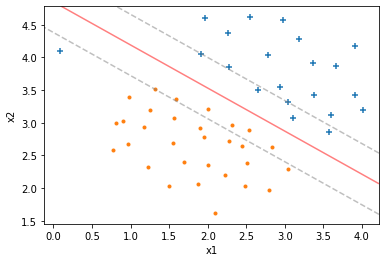

In [269]:
# C = 1
plot_data()
plot_decision_boundary(fit_svm(x, y, "linear", C=1))
plt.show()

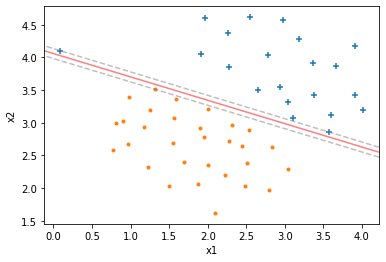

In [270]:
# C = 100
plot_data()
plot_decision_boundary(fit_svm(x, y, "linear", C=100))
plt.show()

## Gaussian Kernel

Finding non-linear decision boundaries:


$$K(x^{(i)}, x^{(j)}) = exp( - \frac{||x^{(i)} - x^{(j)}||^2}{2 \sigma^2 } )
    = exp( - \frac{ \sum^{n}_{k=0} (x_k^{(i)} - x_k^{(j)})^2}{2 \sigma^2 } )$$
    
$\sigma$ controls how fast similarity metric decreases when $x^{(i)}$ and $x^{(j)}$ go further apart.

In [262]:
#load data
data2 = scipy.io.loadmat('../data/ex6data2.mat')

x2 = data2['X']
y2 = data2['y']

print("x", x2.shape, "y", y2.shape)

x (863, 2) y (863, 1)


In [263]:
# plot data
def plot_data2():
    positive = x2[(y2 == 1).T[0],:]
    negative = x2[(y2 == 0).T[0],:]

    plt.scatter(positive[:,0], positive[:,1], marker="+")
    plt.scatter(negative[:,0], negative[:,1], marker=".")
    plt.xlabel("x1")
    plt.ylabel("x2")
    

$$\gamma = \frac{1}{(2 \sigma^2)}$$

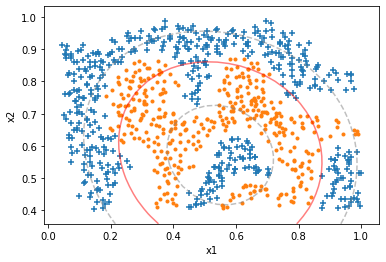

In [264]:
# gamma = 0.5 (sigma = 1)
plot_data2()
plot_decision_boundary(fit_svm(x2, y2, "rbf", C=1, gamma=1))
plt.show()

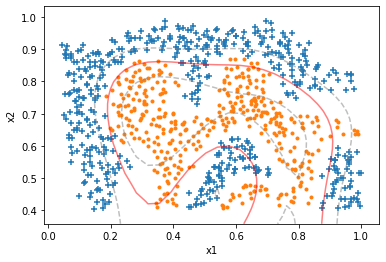

In [265]:
# gamma = 10 (sigma = 0.22)
plot_data2()
plot_decision_boundary(fit_svm(x2, y2, "rbf", C=1, gamma=10))
plt.show()